# COVID-19 Dataset

Number of Confirmed, Death and Recovered cases every day across the globe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('full_grouped.csv')
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [4]:
print(df['Country/Region'].nunique())
print(df['WHO Region'].nunique())


187
6


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

Ukraine dataset:

In [6]:
ukr_df = df[df['Country/Region'] == 'Ukraine'].copy()
ukr_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
175,2020-01-22,Ukraine,0,0,0,0,0,0,0,Europe
362,2020-01-23,Ukraine,0,0,0,0,0,0,0,Europe
549,2020-01-24,Ukraine,0,0,0,0,0,0,0,Europe
736,2020-01-25,Ukraine,0,0,0,0,0,0,0,Europe
923,2020-01-26,Ukraine,0,0,0,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
34396,2020-07-23,Ukraine,63169,1570,35035,26564,874,17,859,Europe
34583,2020-07-24,Ukraine,64173,1591,35932,26650,1004,21,897,Europe
34770,2020-07-25,Ukraine,65317,1610,36573,27134,1144,19,641,Europe
34957,2020-07-26,Ukraine,66261,1625,36885,27751,944,15,312,Europe


average number of new cases by region and month:

In [7]:
df['Month'] = df['Date'].dt.month
groupby_month = df.groupby(['Month','WHO Region'])[['New cases',	'New deaths',	'New recovered']].mean()
pivot_table = groupby_month.unstack('Month')['New cases']
pivot_table

Month,1,2,3,4,5,6,7
WHO Region,,,,,,,
Africa,0.000000,0.001437,2.692204,15.051389,51.787634,140.748611,322.623457
Americas,0.028571,0.040394,199.249770,1075.026667,1467.895853,2274.504762,3721.209524
Eastern Mediterranean,0.018182,1.137931,78.538123,205.287879,483.322581,844.590909,696.994949
Europe,0.032143,0.919951,279.035138,613.941667,387.027074,325.714286,383.935185
South-East Asia,0.200000,0.086207,15.374194,173.863333,695.529032,1787.690000,3801.500000
Western Pacific,58.250000,157.523707,46.649194,89.291667,68.943548,70.741667,174.347222


look at another dataset:

In [8]:
df2 = pd.read_csv('day_wise.csv')
df2['Date'] = pd.to_datetime(df2['Date'])
df2

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


add a column 'No. of countries' to our dataset:

In [9]:
merged_data = pd.merge(df, df2, on='Date')
merged_data

,Date,Country/Region,Confirmed_x,Deaths_x,Recovered_x,Active_x,New cases_x,New deaths_x,New recovered_x,WHO Region,...,Deaths_y,Recovered_y,Active_y,New cases_y,New deaths_y,New recovered_y,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,...,17,28,510,0,0,0,3.06,5.05,60.71,6
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,17,28,510,0,0,0,3.06,5.05,60.71,6
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,...,17,28,510,0,0,0,3.06,5.05,60.71,6
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,...,17,28,510,0,0,0,3.06,5.05,60.71,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,...,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,...,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,...,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,...,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187



convert data into long format for Ukraine using the method melt()

In [12]:
ukr_df = df[df['Country/Region'] == 'Ukraine'].copy()
ukr_df.melt(id_vars=['Date', 'Month'],  value_vars=['New cases', 'New deaths', 'New recovered'])

,Date,Month,variable,value
0,2020-01-22,1,New cases,0
1,2020-01-23,1,New cases,0
2,2020-01-24,1,New cases,0
3,2020-01-25,1,New cases,0
4,2020-01-26,1,New cases,0
...,...,...,...,...
559,2020-07-23,7,New recovered,859
560,2020-07-24,7,New recovered,897
561,2020-07-25,7,New recovered,641
562,2020-07-26,7,New recovered,312


graph of the total number of new cases per day of illness by region:

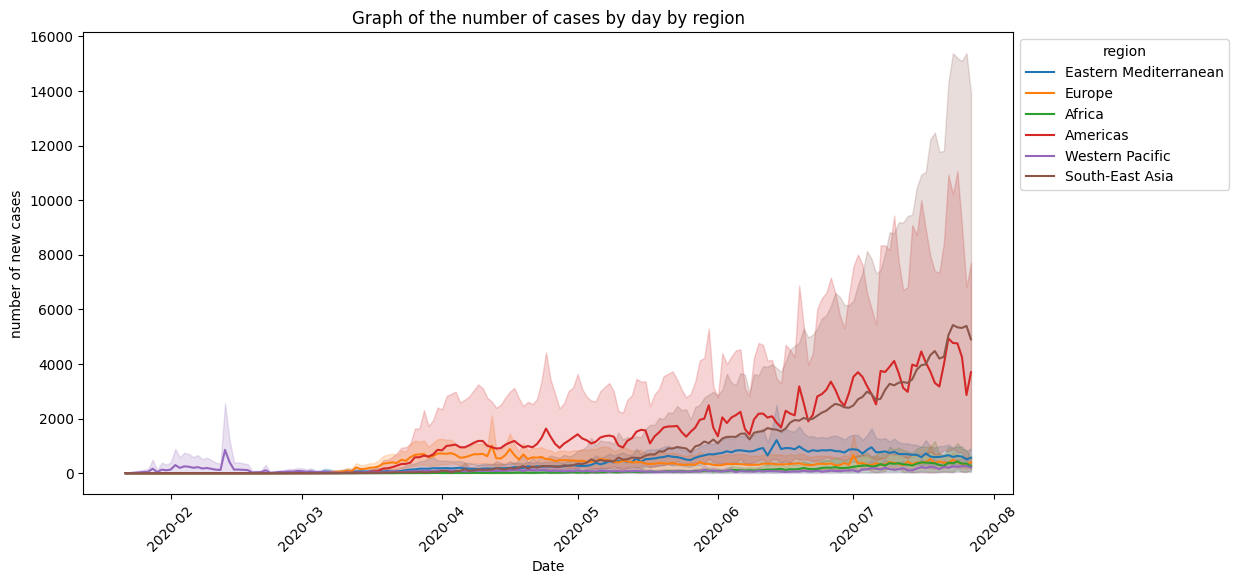

In [11]:
groupby_region = df.groupby(['WHO Region','Date'])[[ 'New cases']].sum().reset_index()

plt.figure(figsize=(12, 6))

unique_regions = df['WHO Region'].unique()
palette = sns.color_palette("Set1", len(unique_regions))
for i, region in enumerate(unique_regions):
    region_data = df[df['WHO Region'] == region]
    sns.lineplot(data=region_data, x="Date", y="New cases", label=region)

plt.title("Graph of the number of cases by day by region")
plt.xlabel("Date")
plt.ylabel("number of new cases")
plt.legend(title="region", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.show()
